In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('spamsms.csv', encoding = "ISO-8859-1")
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

# 1. Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# Not found usable last 3 column so remove it
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.sample(5)

,target,text
5034,ham,How many times i told in the stage all use to ...
4851,ham,I liked your new house
3370,ham,Tomorrow i am not going to theatre. . . So i c...
1607,ham,Jus telling u dat i'll b leaving 4 shanghai on...
3582,ham,I sent your maga that money yesterday oh.


In [6]:
# Convert columns to integers using Labelencoder function Because messages are either ham or Spam so.
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head()
# df.to_csv('zclean_spamsms.csv')

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df = pd.read_csv('zfinaldataset.csv')
df.sample()

,target,text
689,0,Hi i won't b ard 4 christmas. But do enjoy n m...


In [8]:
# Checking Missing Values
df.isnull().sum()

target    0
text      0
dtype: int64

In [9]:
# Check for duplicate values
df.duplicated().sum()

916

In [10]:
# Remove duplicate entries
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

# 2. Exploratory Data Analysis(EDA) 
 - Understanding data


In [11]:
df['target'].value_counts()  # Check what in inside our data

target
0    8154
1    2462
Name: count, dtype: int64

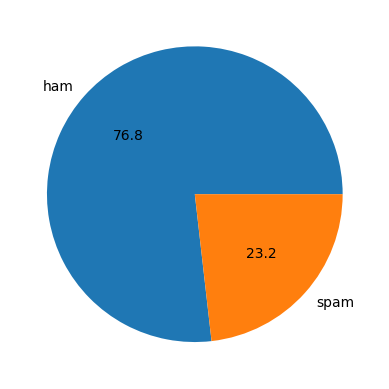

In [12]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.1f")
plt.show()
# Data is inbalanced

In [13]:
# For deeper understanding we will create new 3 columns -
# 1. Number of characters in SMS
# 2. Number of words in SMS
# 3. Number of Sentences in SMS

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bkbhe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
# Howmany characters in sinle column by using text column
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,1,Confirm your identity with Apple by clicking t...,73
1,1,Real estate spam words,22
2,1,The IRS is trying to reach you regarding a tax...,100
3,1,Real Estate,13
4,1,SMS Marketing Pricing,23


In [15]:
# Convert messages into numbers of words and sentences
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,1,Confirm your identity with Apple by clicking t...,73,17,2
1,1,Real estate spam words,22,4,1
2,1,The IRS is trying to reach you regarding a tax...,100,24,2
3,1,Real Estate,13,2,1
4,1,SMS Marketing Pricing,23,3,1


In [16]:
df[['num_characters', 'num_words', 'num_sentences']].describe() # 

,num_characters,num_words,num_sentences
count,10616.000000,10616.000000,10616.000000
mean,2129.564243,410.555576,7.259891
std,4735.704103,752.875636,17.540130
min,2.000000,1.000000,1.000000
25%,60.000000,15.000000,1.000000
50%,799.000000,155.000000,3.000000
75%,3306.250000,604.000000,8.000000
max,232305.000000,18622.000000,809.000000


In [17]:
# Output for ham messages
df[df['target'] == 0] [['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,8154.000000,8154.000000,8154.000000
mean,1583.189232,292.792127,6.156365
std,2708.339218,500.185550,15.865255
min,2.000000,1.000000,1.000000
25%,48.000000,12.000000,1.000000
50%,143.000000,34.000000,3.000000
75%,3019.000000,552.000000,7.000000
max,92469.000000,17677.000000,809.000000


In [18]:
# Output for spam messages
df[df['target'] == 1 ] [['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,2462.000000,2462.000000,2462.000000
mean,3939.126320,800.581235,10.914703
std,8256.413855,1190.755483,21.811427
min,4.000000,1.000000,1.000000
25%,158.000000,32.000000,3.000000
50%,2470.500000,460.000000,5.000000
75%,4863.500000,1038.750000,11.000000
max,232305.000000,18622.000000,408.000000


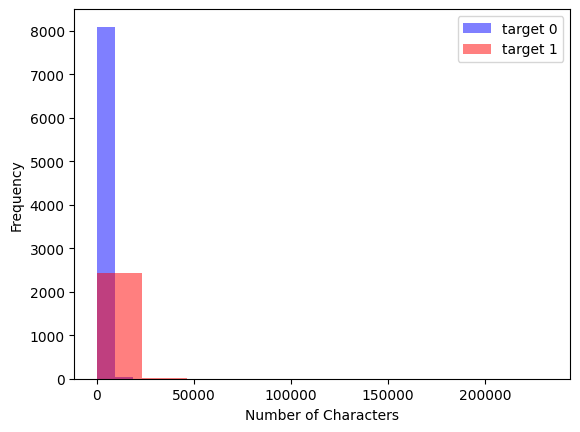

In [19]:
# import seaborn as sns
# sns.histplot(df[df['target'] == 0]['num_characters'])
# sns.histplot(df[df['target'] == 1]['num_characters'], color='red')
import matplotlib.pyplot as plt

# Create histograms for the 'num_characters' column based on 'target'
plt.hist(df[df['target'] == 0]['num_characters'], alpha=0.5, label='target 0', color='blue')
plt.hist(df[df['target'] == 1]['num_characters'], alpha=0.5, label='target 1', color='red')

# Add labels and a legend
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

# Show the plot
plt.show()

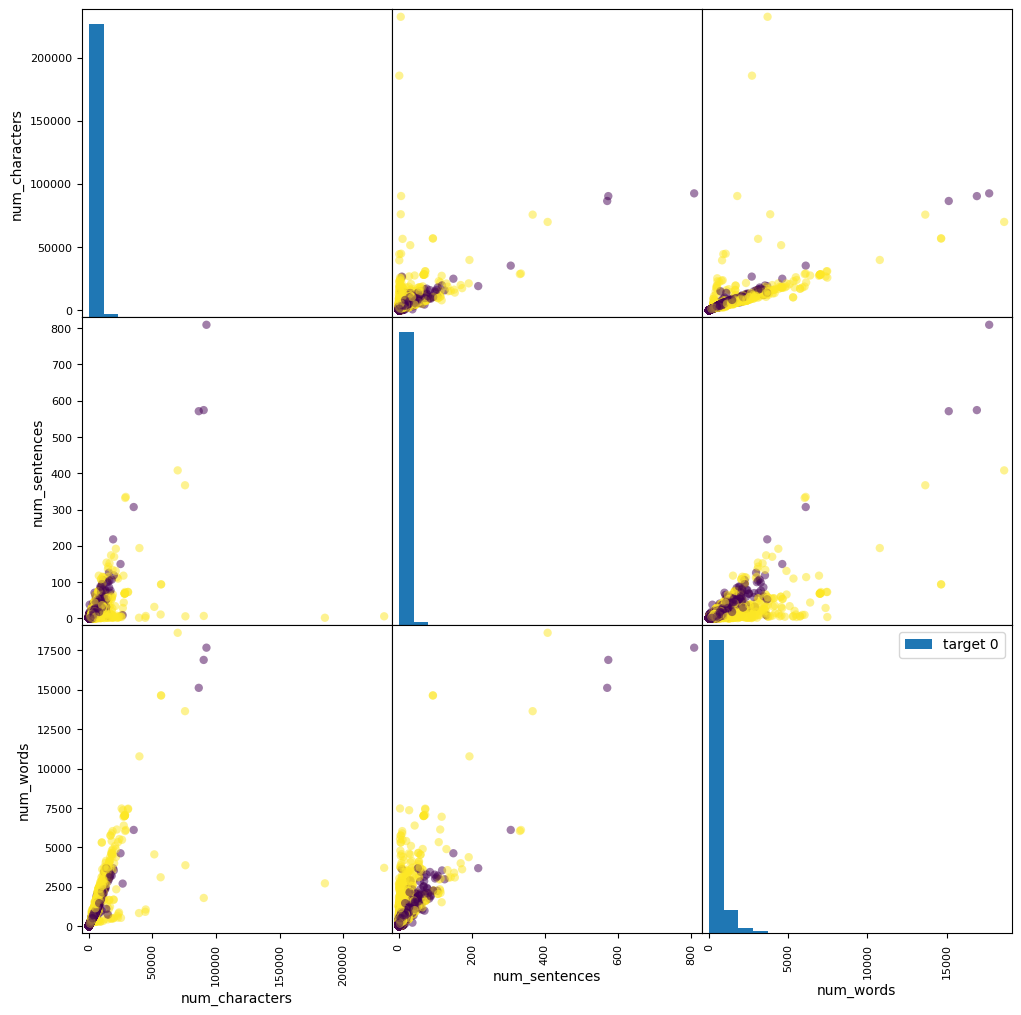

In [20]:
# No. of sentences relation with words

import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

columns_to_visualize = df.columns.difference(['target'])
scatter_matrix(df[columns_to_visualize], c=df['target'], figsize=(12, 12), marker='o', hist_kwds={'bins': 20}) # Create a scatter matrix
plt.legend(['target 0', 'target 1'])
plt.show()


Text(0.5, 1.0, 'Correlation Heatmap')

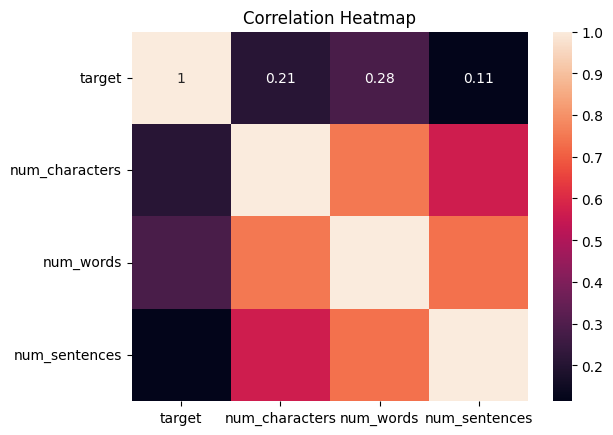

In [21]:
import seaborn as sns 
numeric_columns = df.select_dtypes(include=['float64', 'int64', 'int32'])
correlation_matrix = numeric_columns.corr()  # Calculate correlation matrix. 
# Create only one column and heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
# df.corr()

# 3. Data Preprocessing  (Find words)
 - Lower case 
 - Tokenization (Break into words)
 - Removing Specical characters  
 - Removing Stop words(Use in sentence formation) and punctuation.
 - Stemming(Dance, Dance, Dancing)

In [22]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bkbhe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
from nltk.corpus import stopwords
import string
print(string.punctuation, "\n", stopwords.words('english'))

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 
 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'on

In [24]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            if i.isalnum():
                # y.append(ps.stem(i))
                y.append(i)
    return " ".join(y)
df['transformed_text'] = df['text'].apply(transform_text)
df.head(25)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,1,Confirm your identity with Apple by clicking t...,73,17,2,confirm identity apple clicking link link thank
1,1,Real estate spam words,22,4,1,real estate spam words
2,1,The IRS is trying to reach you regarding a tax...,100,24,2,irs trying reach regarding tax refund please c...
3,1,Real Estate,13,2,1,real estate
4,1,SMS Marketing Pricing,23,3,1,sms marketing pricing
6,1,Technology spam words,21,3,1,technology spam words
7,1,Keep your phone safe and secure by blocking un...,203,33,2,keep phone safe secure blocking unwelcome numb...
8,1,Company Tech Support Request,28,4,1,company tech support request
9,1,Your Amazon account has been suspended. Please...,89,16,2,amazon account suspended please click reactiva...
10,1,This is an emergency. Your brother needs help....,127,29,4,emergency brother needs help taken hostage ran...


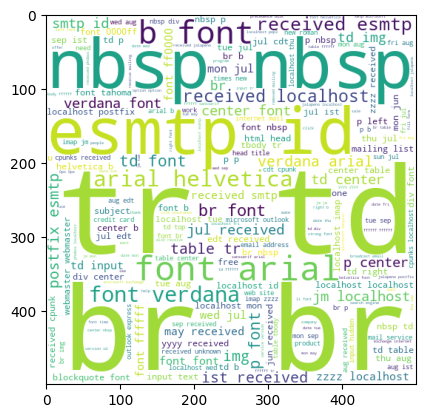

In [25]:
# Display most used and import message in big words.
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size=5, background_color ='white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

In [26]:
# Total words of spam messages
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
len(spam_corpus)

590581

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'font'),
  Text(1, 0, 'br'),
  Text(2, 0, '2002'),
  Text(3, 0, 'http'),
  Text(4, 0, 'td'),
  Text(5, 0, 'nbsp'),
  Text(6, 0, 'received'),
  Text(7, 0, 'b'),
  Text(8, 0, 'p'),
  Text(9, 0, 'id'),
  Text(10, 0, 'tr'),
  Text(11, 0, 'arial'),
  Text(12, 0, 'localhost'),
  Text(13, 0, '0'),
  Text(14, 0, '2'),
  Text(15, 0, 'center'),
  Text(16, 0, 'jul'),
  Text(17, 0, 'esmtp'),
  Text(18, 0, 'helvetica'),
  Text(19, 0, 'jm'),
  Text(20, 0, 'verdana'),
  Text(21, 0, 'img'),
  Text(22, 0, '1'),
  Text(23, 0, 'ffffff'),
  Text(24, 0, 'email'),
  Text(25, 0, 'free'),
  Text(26, 0, 'table'),
  Text(27, 0, 'may'),
  Text(28, 0, 'mon'),
  Text(29, 0, '3')])

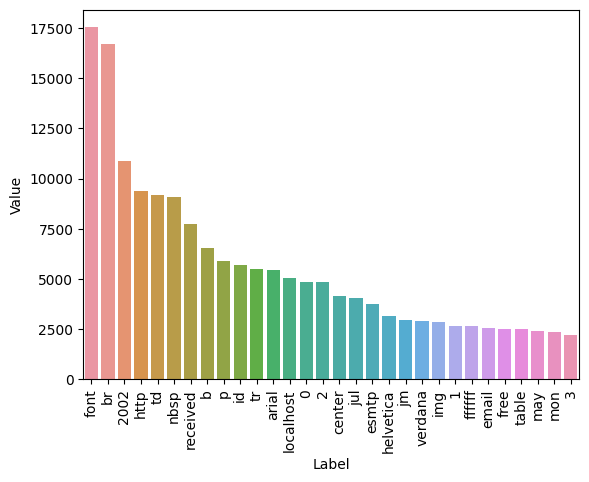

In [27]:
# Most common used words in spam
import warnings
from collections import Counter

# Filter out the FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

spam_counter = Counter(spam_corpus)
most_common_data = spam_counter.most_common(30)
data_df = pd.DataFrame(most_common_data, columns=['Label', 'Value'])
sns.barplot(x='Label', y='Value', data=data_df)
plt.xticks(rotation='vertical')

# 4. Model Building

In [28]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer #Text to Numerical Value
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(10616, 3000)

In [29]:
y = df['target'].values
y

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=3)
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

print('Classifier', "accuracy_score", "precision_score")
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print("GNB - ", accuracy_score(y_test,y_pred1), precision_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print("MNB - ", accuracy_score(y_test,y_pred2), precision_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print("BNB - ", accuracy_score(y_test,y_pred3), precision_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

Classifier accuracy_score precision_score
GNB -  0.8997175141242938 0.703150912106136
[[1487  179]
 [  34  424]]
MNB -  0.9510357815442562 0.951530612244898
[[1647   19]
 [  85  373]]
BNB -  0.8983050847457628 0.8805031446540881
[[1628   38]
 [ 178  280]]


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
# from xgboost import XGBClassifier

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
# xgb = XGBClassifier(n_estimators=50,random_state=2)

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    # 'xgb':xgb
}

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9670433145009416, 0.9597156398104265)

In [32]:
accuracy_scores = []
precision_scores = []
print("Name, Current Accuracy, Current Precision")

for name,clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    fcurrent_accuracy = "{:.2%}".format(current_accuracy)
    fcurrent_precision ="{:.2%}".format(current_precision)    
    print(f"{name}, {fcurrent_accuracy}, {fcurrent_precision}")
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

Name, Current Accuracy, Current Precision
SVC, 96.70%, 95.97%
KN, 90.44%, 97.75%
NB, 95.10%, 95.15%
DT, 91.90%, 89.50%
LR, 96.23%, 97.01%
RF, 96.99%, 98.05%
AdaBoost, 95.76%, 93.40%
BgC, 95.53%, 91.34%
ETC, 97.03%, 96.91%
GBDT, 94.11%, 98.26%


In [33]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
9,GBDT,0.941149,0.982609
5,RF,0.969868,0.980488
1,KN,0.904426,0.977528
4,LR,0.962335,0.970149
8,ETC,0.970339,0.969121
0,SVC,0.967043,0.959716
2,NB,0.951036,0.951531
6,AdaBoost,0.957627,0.933962
7,BgC,0.955273,0.913440
3,DT,0.919021,0.895028


In [37]:
# Get the top 3 models
import os
import pickle

top_3_models = performance_df.head(3)
print(top_3_models)

for _, row in top_3_models.iterrows():
    algorithm_name = row['Algorithm']

    try:
        model = clfs.get(algorithm_name)
        model_file_path = f'model/{algorithm_name}_model.pkl'
        with open(model_file_path, 'wb') as model_file:
            print(model, model_file)
            pickle.dump(model, model_file)
    except Exception as e:
        print(e)

  Algorithm  Accuracy  Precision
9      GBDT  0.941149   0.982609
5        RF  0.969868   0.980488
1        KN  0.904426   0.977528
GradientBoostingClassifier(n_estimators=50, random_state=2) <_io.BufferedWriter name='model/GBDT_model.pkl'>
RandomForestClassifier(n_estimators=50, random_state=2) <_io.BufferedWriter name='model/RF_model.pkl'>
KNeighborsClassifier() <_io.BufferedWriter name='model/KN_model.pkl'>


In [35]:
pickle.dump(tfidf, open('model/vectorizer.pkl','wb'))


In [41]:
pickle.dump(mnb, open('model/model.pkl', 'wb'))

In [ ]:
pickle.dump(mnb, open('model/gbdtmodel.pkl', 'wb'))
pickle.dump(mnb, open('model/knmodel.pkl', 'wb'))
pickle.dump(mnb, open('model/rfmodel.pkl', 'wb'))